In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('//Users/johnhutchens/Desktop/Practicum/Data/OTC_Human/ems_otc_hum_matrices.pickle',
           'rb') as f:
    esm_dict = pickle.load(f)

with open('/Users/johnhutchens/Desktop/Practicum/Data/OTC_Human/pg2_otc_hum_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [3]:
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_list = [x for x in amino_acids]

In [4]:
# aa_list

In [18]:
pg_dict['A102E']

{'mutated_sequence': 'MLFNLRILLNNAAFRNGHNFMVRNFRCGQPLQNKVQLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGFELLGGHPCFLTTQDIHLGVNESLTDTARVLSSMADAVLARVYKQSDLDTLAKEASIPIINGLSDLYHPIQILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAHGGNVLITDTWISMGQEEEKKKRLQAFQGYQVTMKTAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF',
 'DMS_score': 0.4379999999999999,
 'log_probs': tensor([[-3.0771, -4.3744, -3.9293,  ..., -3.5056, -4.9663, -4.5736],
         [-2.4809, -4.2470, -3.2702,  ..., -3.3394, -4.9351, -4.0413],
         [-2.7221, -4.0177, -3.1940,  ..., -3.0444, -4.7724, -3.8331],
         ...,
         [-2.5317, -3.9035, -3.5848,  ..., -2.7421, -2.8584, -3.7931],
         [-2.5164, -3.9701, -2.9415,  ..., -2.8257, -4.3615, -3.7234],
         [-2.6169, -4.3407, -3.1171,  ..., -2.7873, -3.2522, -3.4560]]),
 'ref_log_probs': tensor([[-4.0998e+00],
         [-3.4723e+00],
         [-2.4184e+00],
         [-3.1936e+00],
         [-2.8248e+

In [5]:

keys = list(esm_dict.keys())
pg_keys = list(pg_dict.keys())

keys == pg_keys

True

In [83]:
keys[0]

'A102E'

In [84]:
esm_dict[keys[0]]['mutated_sequence']

'MLFNLRILLNNAAFRNGHNFMVRNFRCGQPLQNKVQLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGFELLGGHPCFLTTQDIHLGVNESLTDTARVLSSMADAVLARVYKQSDLDTLAKEASIPIINGLSDLYHPIQILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAHGGNVLITDTWISMGQEEEKKKRLQAFQGYQVTMKTAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF'

In [ ]:
esm_keys = list(esm_dict.keys())
pg_keys = list(pg_dict.keys())

seq_esm_5 = esm_dict[esm_keys[5]]['mutated_sequence']
seq_pg_5 = pg_dict[pg_keys[5]]['mutated_sequence']

print(seq_esm_5)
print(seq_pg_5)
print(len(seq_esm_5))
print(len(seq_pg_5))

MLFNLRILLNNAAFRNGHNFMVRNFRCGQPLQNKVQLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGFVLLGGHPCFLTTQDIHLGVNESLTDTARVLSSMADAVLARVYKQSDLDTLAKEASIPIINGLSDLYHPIQILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAHGGNVLITDTWISMGQEEEKKKRLQAFQGYQVTMKTAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF
MLFNLRILLNNAAFRNGHNFMVRNFRCGQPLQNKVQLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGFVLLGGHPCFLTTQDIHLGVNESLTDTARVLSSMADAVLARVYKQSDLDTLAKEASIPIINGLSDLYHPIQILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAHGGNVLITDTWISMGQEEEKKKRLQAFQGYQVTMKTAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF
354
354


In [21]:
pg_keys[90]

'A294D'

In [22]:
pg_dict['A294D']

{'mutated_sequence': 'MLFNLRILLNNAAFRNGHNFMVRNFRCGQPLQNKVQLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGFALLGGHPCFLTTQDIHLGVNESLTDTARVLSSMADAVLARVYKQSDLDTLAKEASIPIINGLSDLYHPIQILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAHGGNVLITDTWISMGQEEEKKKRLQAFQGYQVTMKTAKVDASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF',
 'DMS_score': 0.002,
 'log_probs': tensor([[-3.1051, -4.3937, -3.9668,  ..., -3.5187, -5.0043, -4.5861],
         [-2.4839, -4.2357, -3.3013,  ..., -3.3426, -4.9614, -4.0335],
         [-2.7228, -4.0084, -3.2294,  ..., -3.0384, -4.7960, -3.8453],
         ...,
         [-2.4831, -3.8278, -3.6220,  ..., -2.7771, -2.8466, -3.8552],
         [-2.4954, -3.9519, -2.9203,  ..., -2.8287, -4.3849, -3.7497],
         [-2.5807, -4.2854, -3.1060,  ..., -2.7666, -3.3798, -3.4833]]),
 'ref_log_probs': tensor([[-4.0176e+00],
         [-3.4083e+00],
         [-2.4143e+00],
         [-3.1897e+00],
         [-2.8135e+00],
        

In [ ]:
lp_esm_matrix90 = esm_dict[esm_keys[90]]['log_probs']

lp_pg_matrix90 = pg_dict[pg_keys[90]]['log_probs']

for i in range(15):
    print(torch.sum(torch.exp(lp_esm_matrix90[i])))
    print(torch.sum(torch.exp(lp_pg_matrix90[i])))

In [33]:
A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']
print(A.shape,B.shape)

torch.Size([354, 20]) torch.Size([354, 20])


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1955/2604276435.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100)]


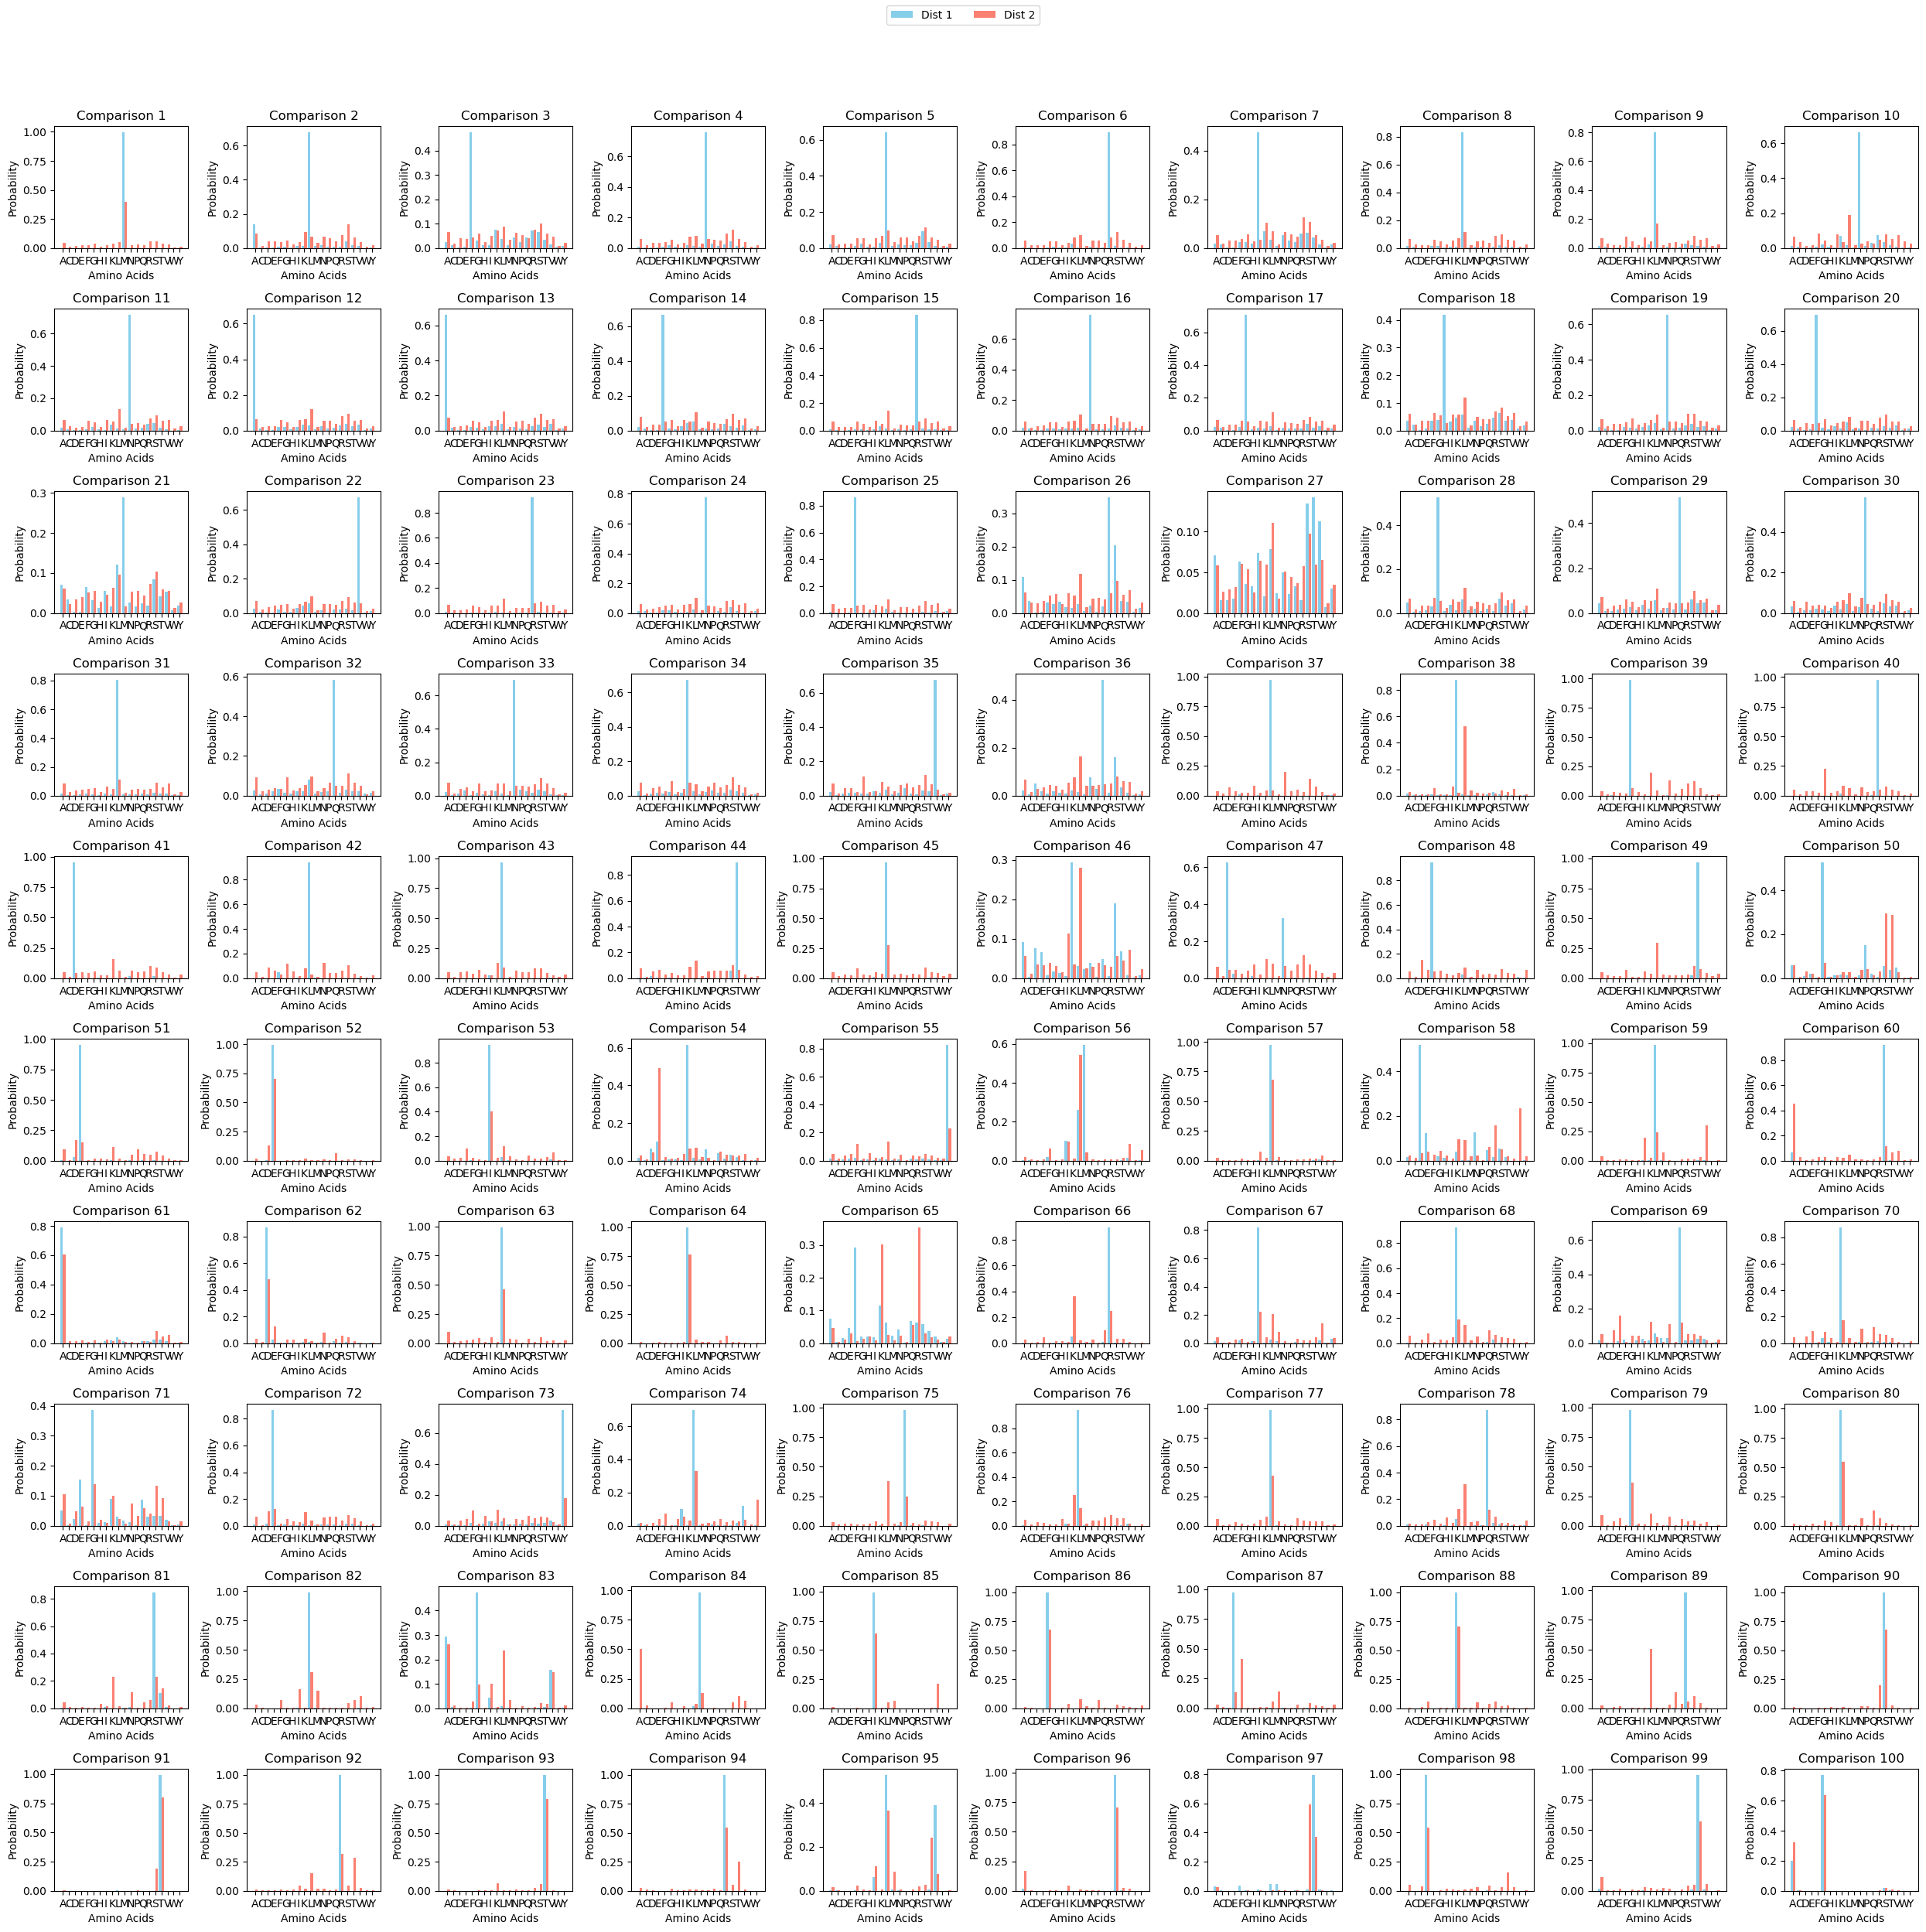

In [ ]:
A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+1}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1955/1886300659.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100,200)]


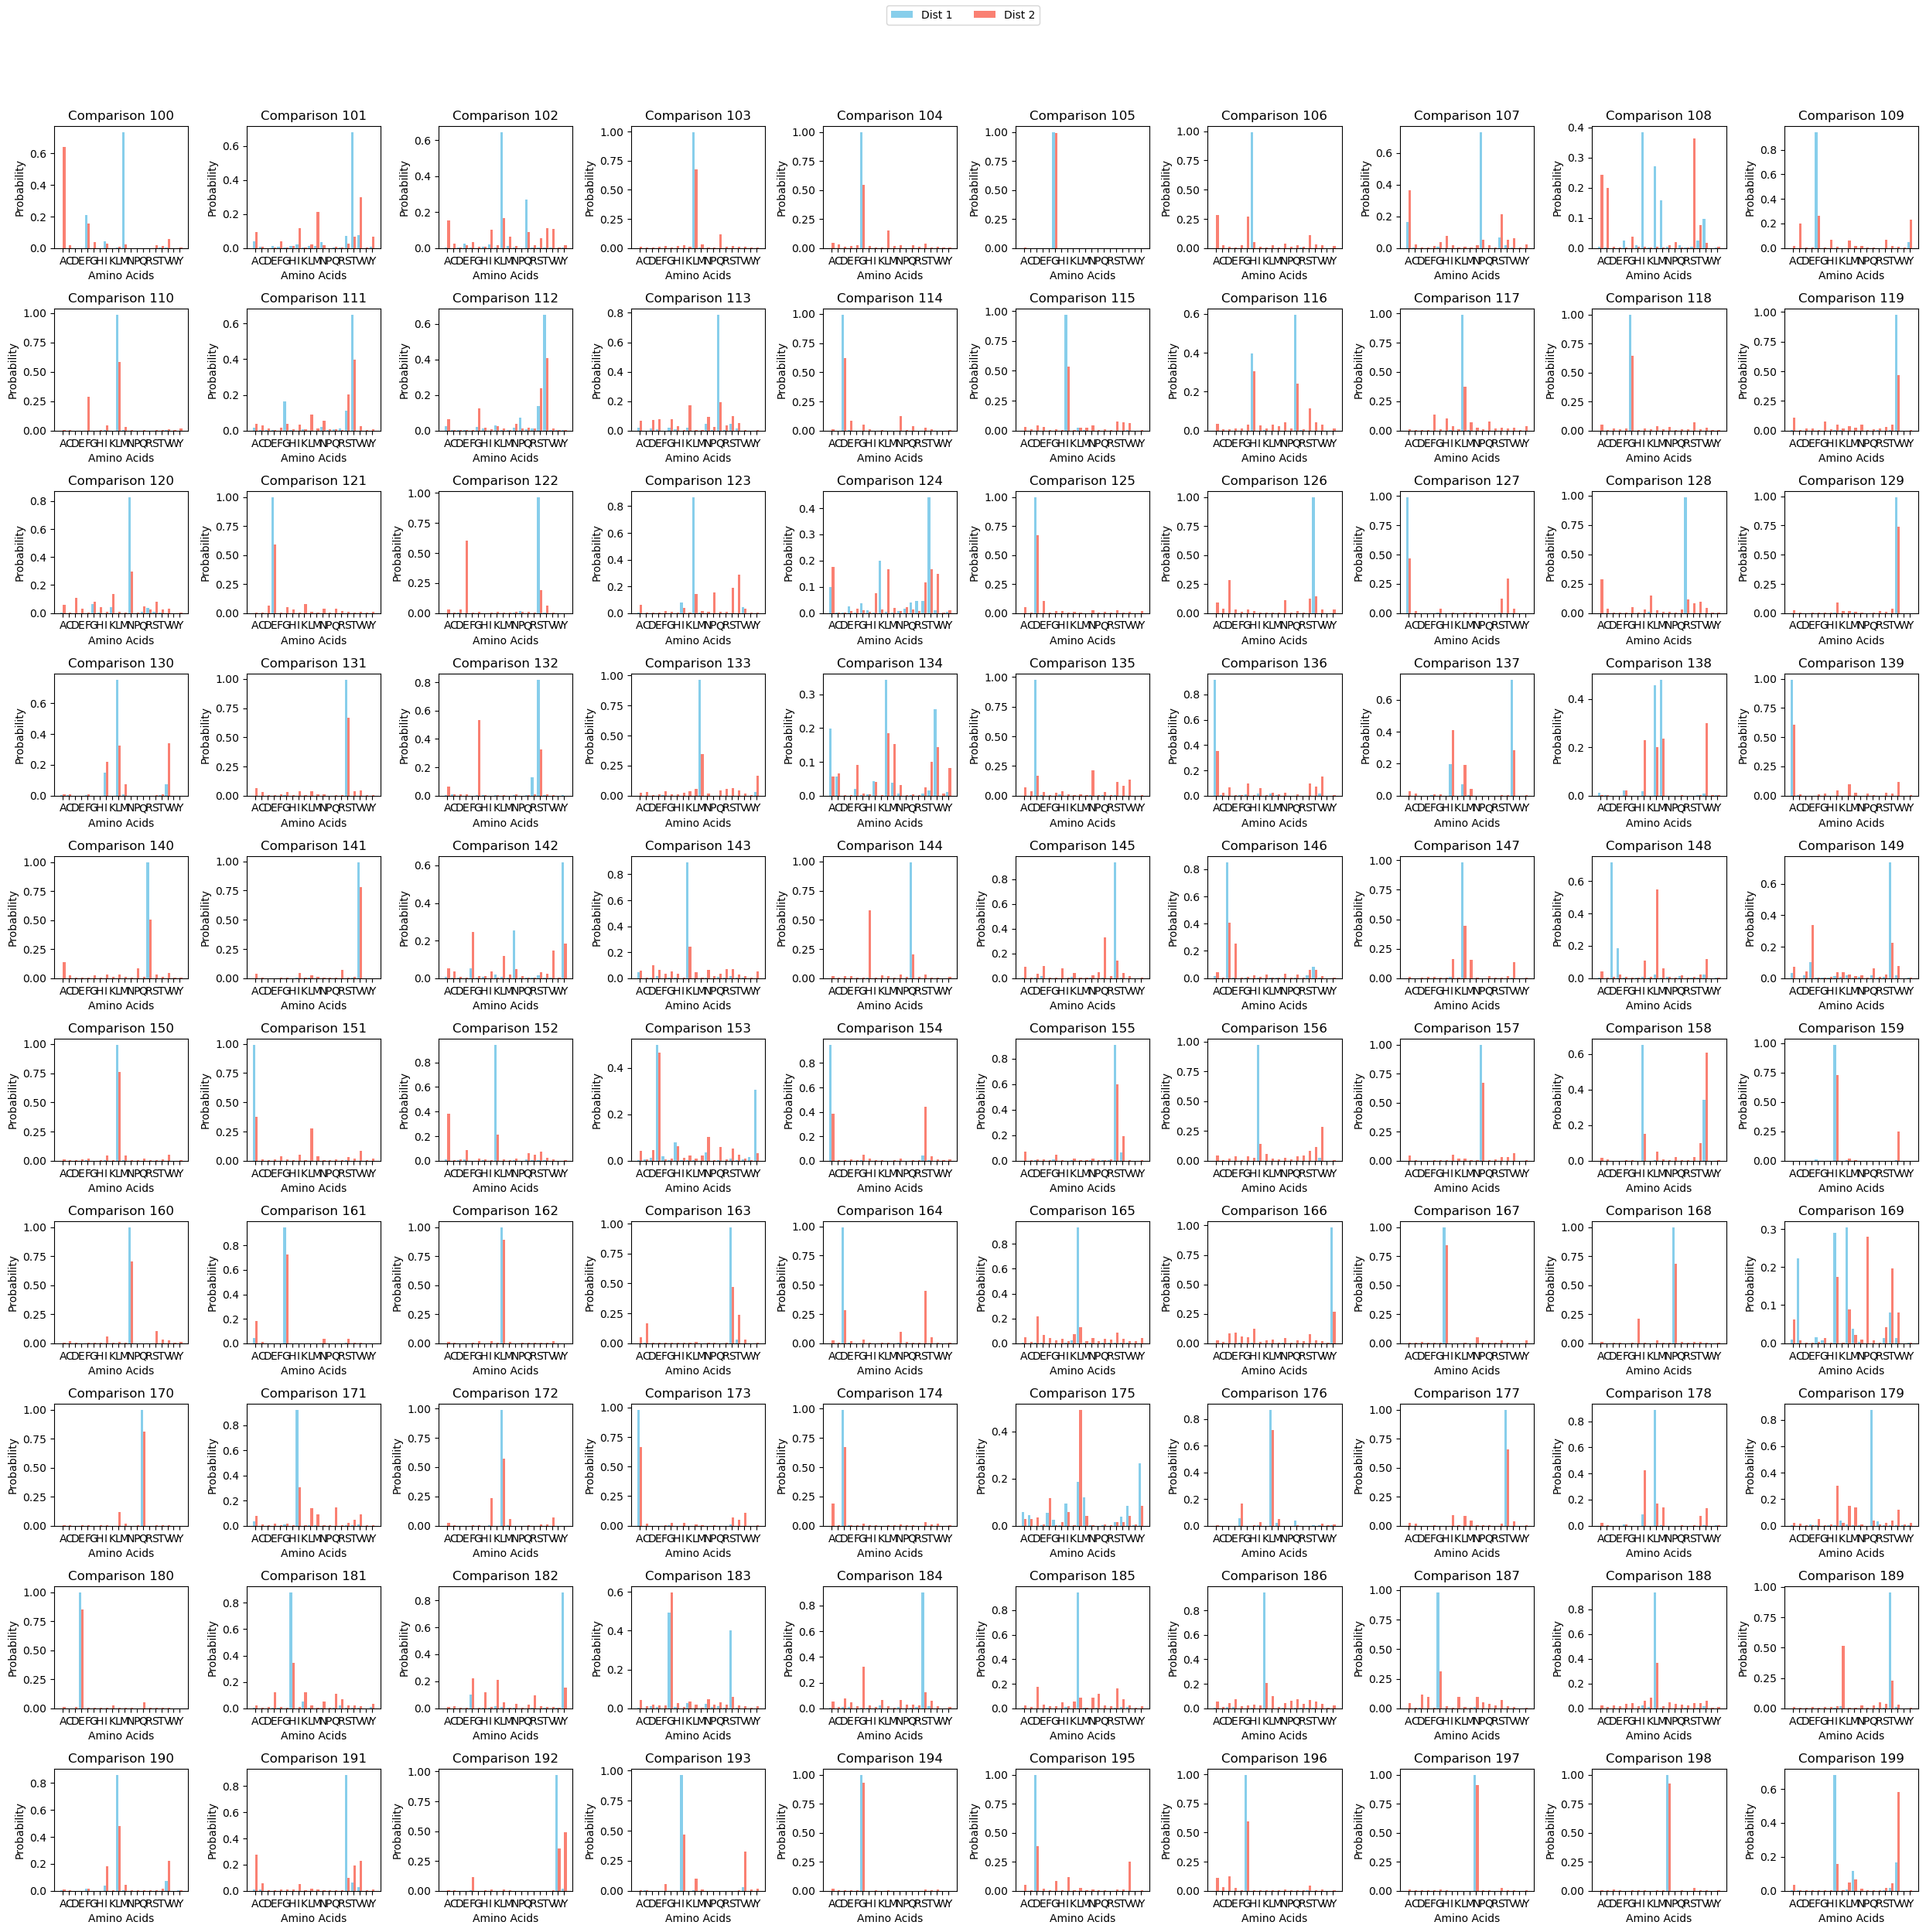

In [37]:
A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100,200)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+100}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1955/3157260877.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(200,300)]


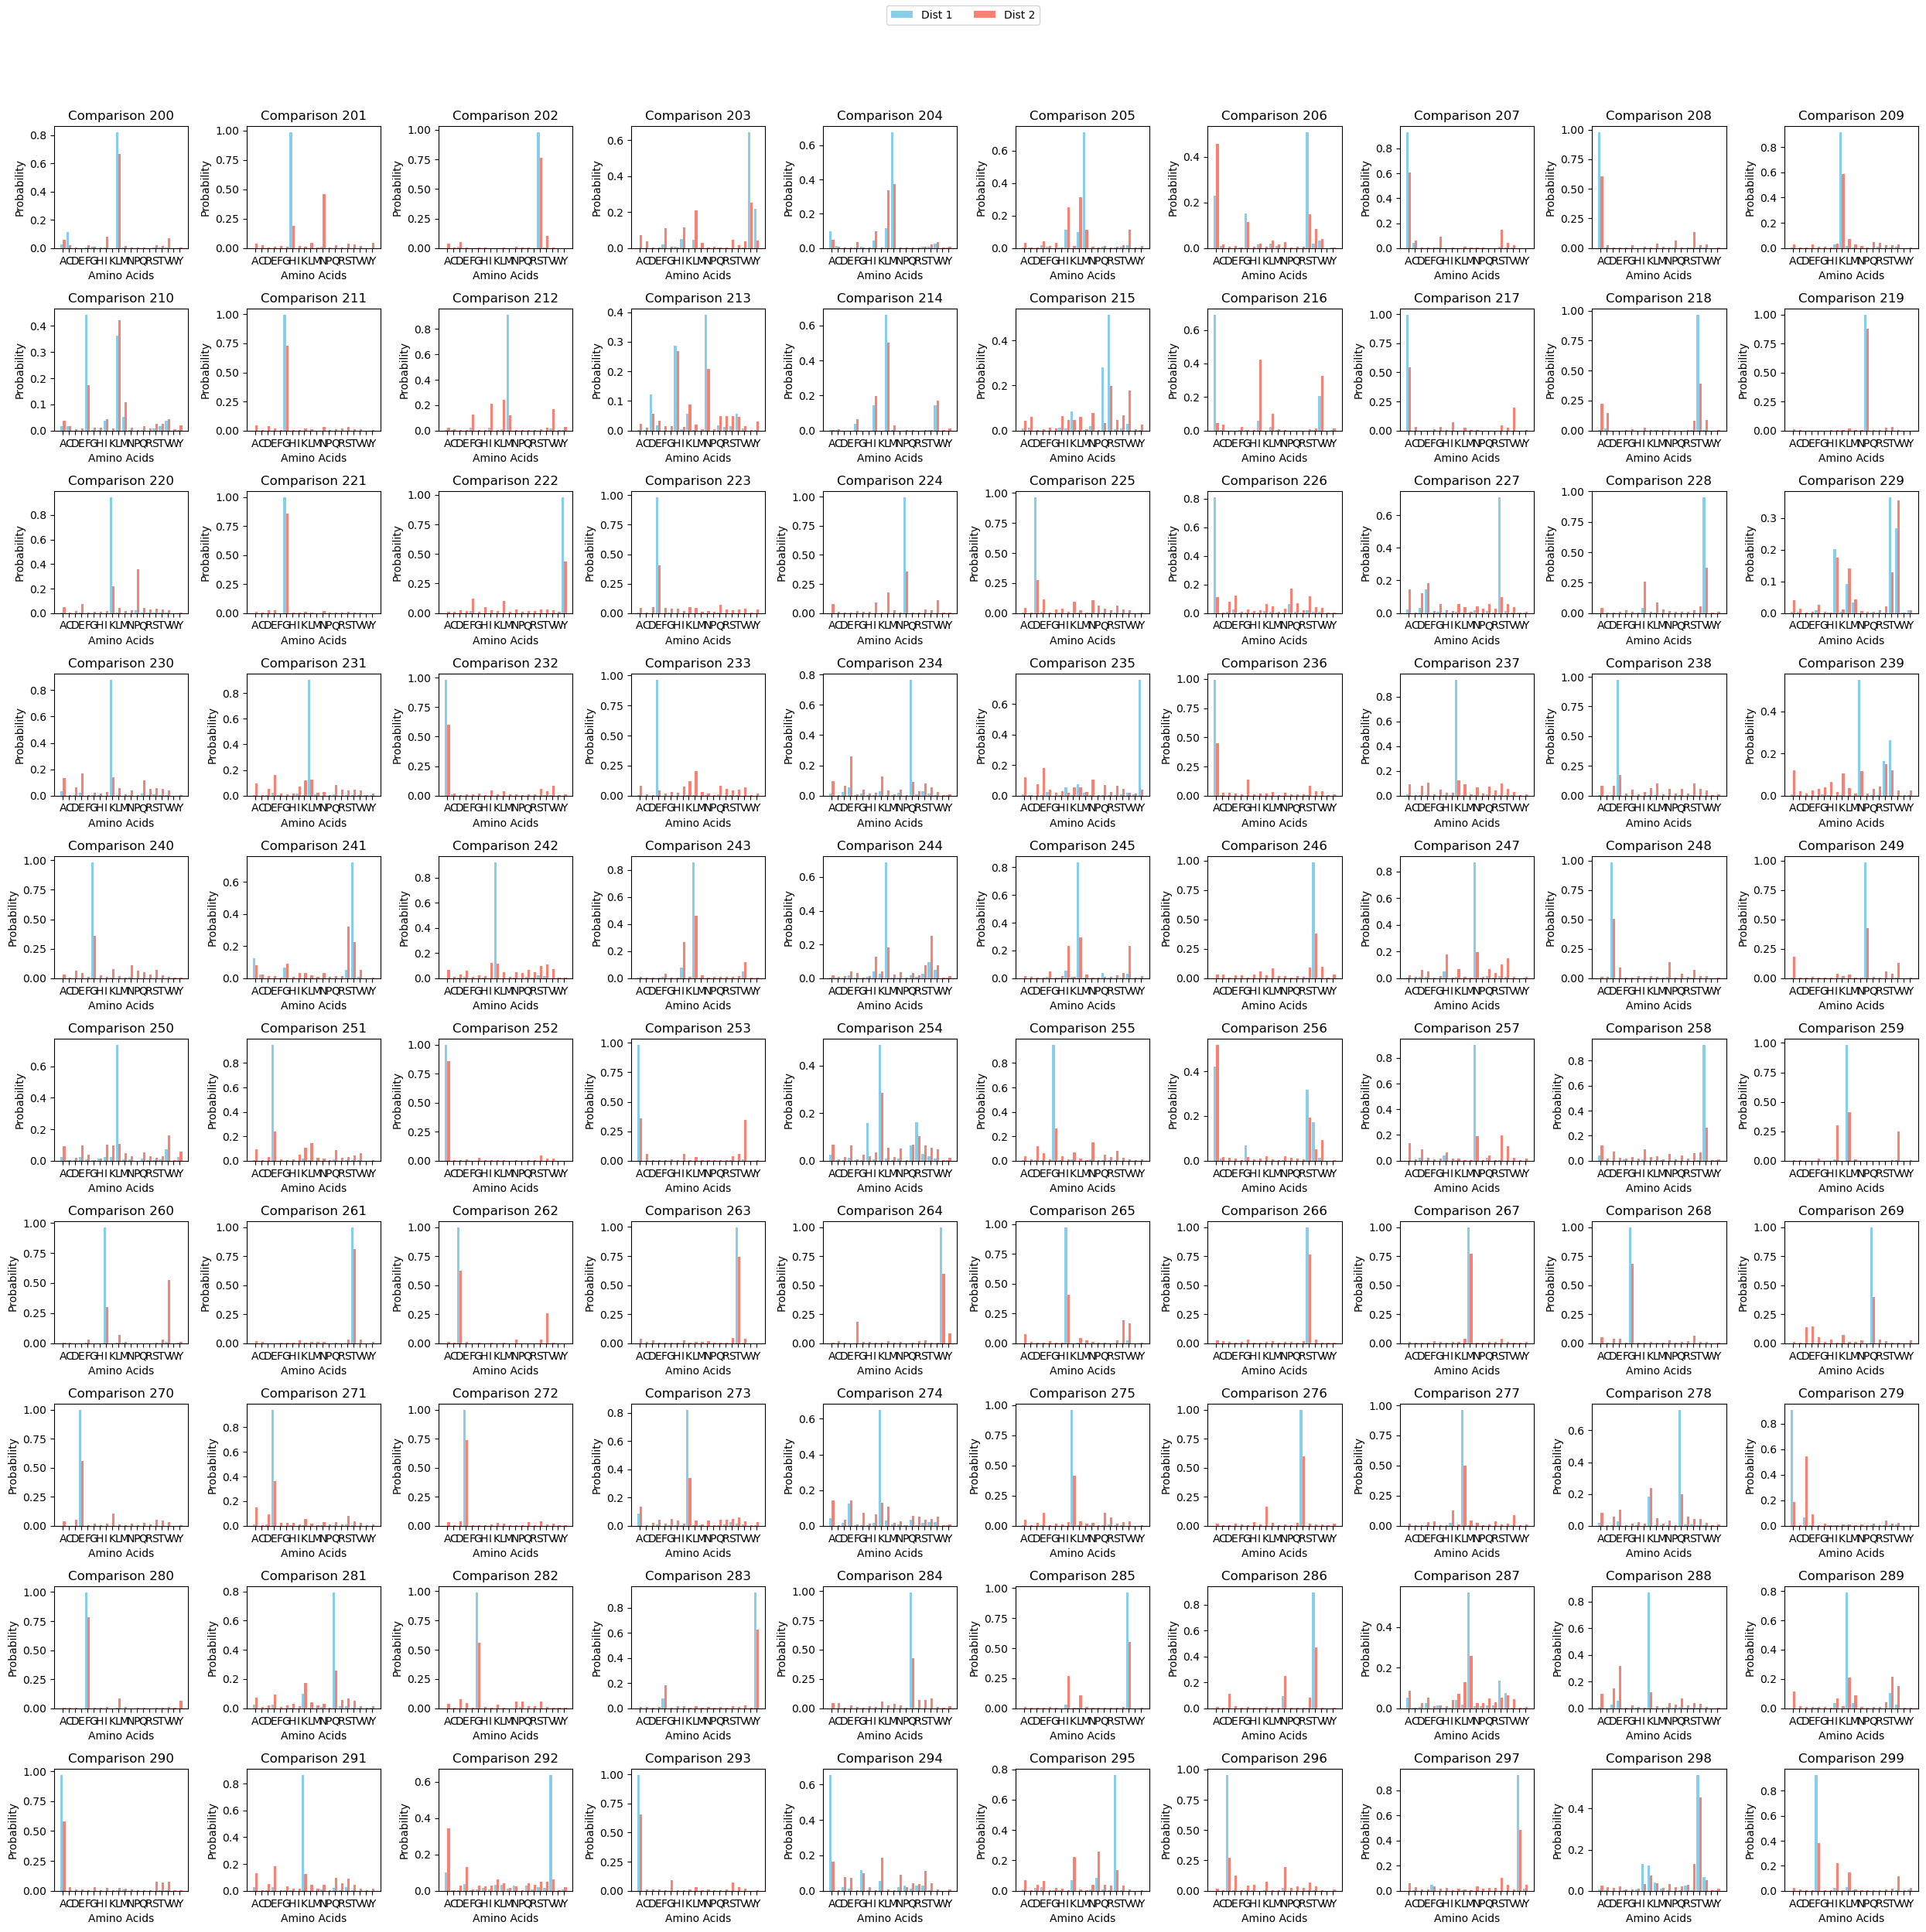

In [40]:
A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(200,300)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+200}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1955/2647323333.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(300,354)]


IndexError: list index out of range

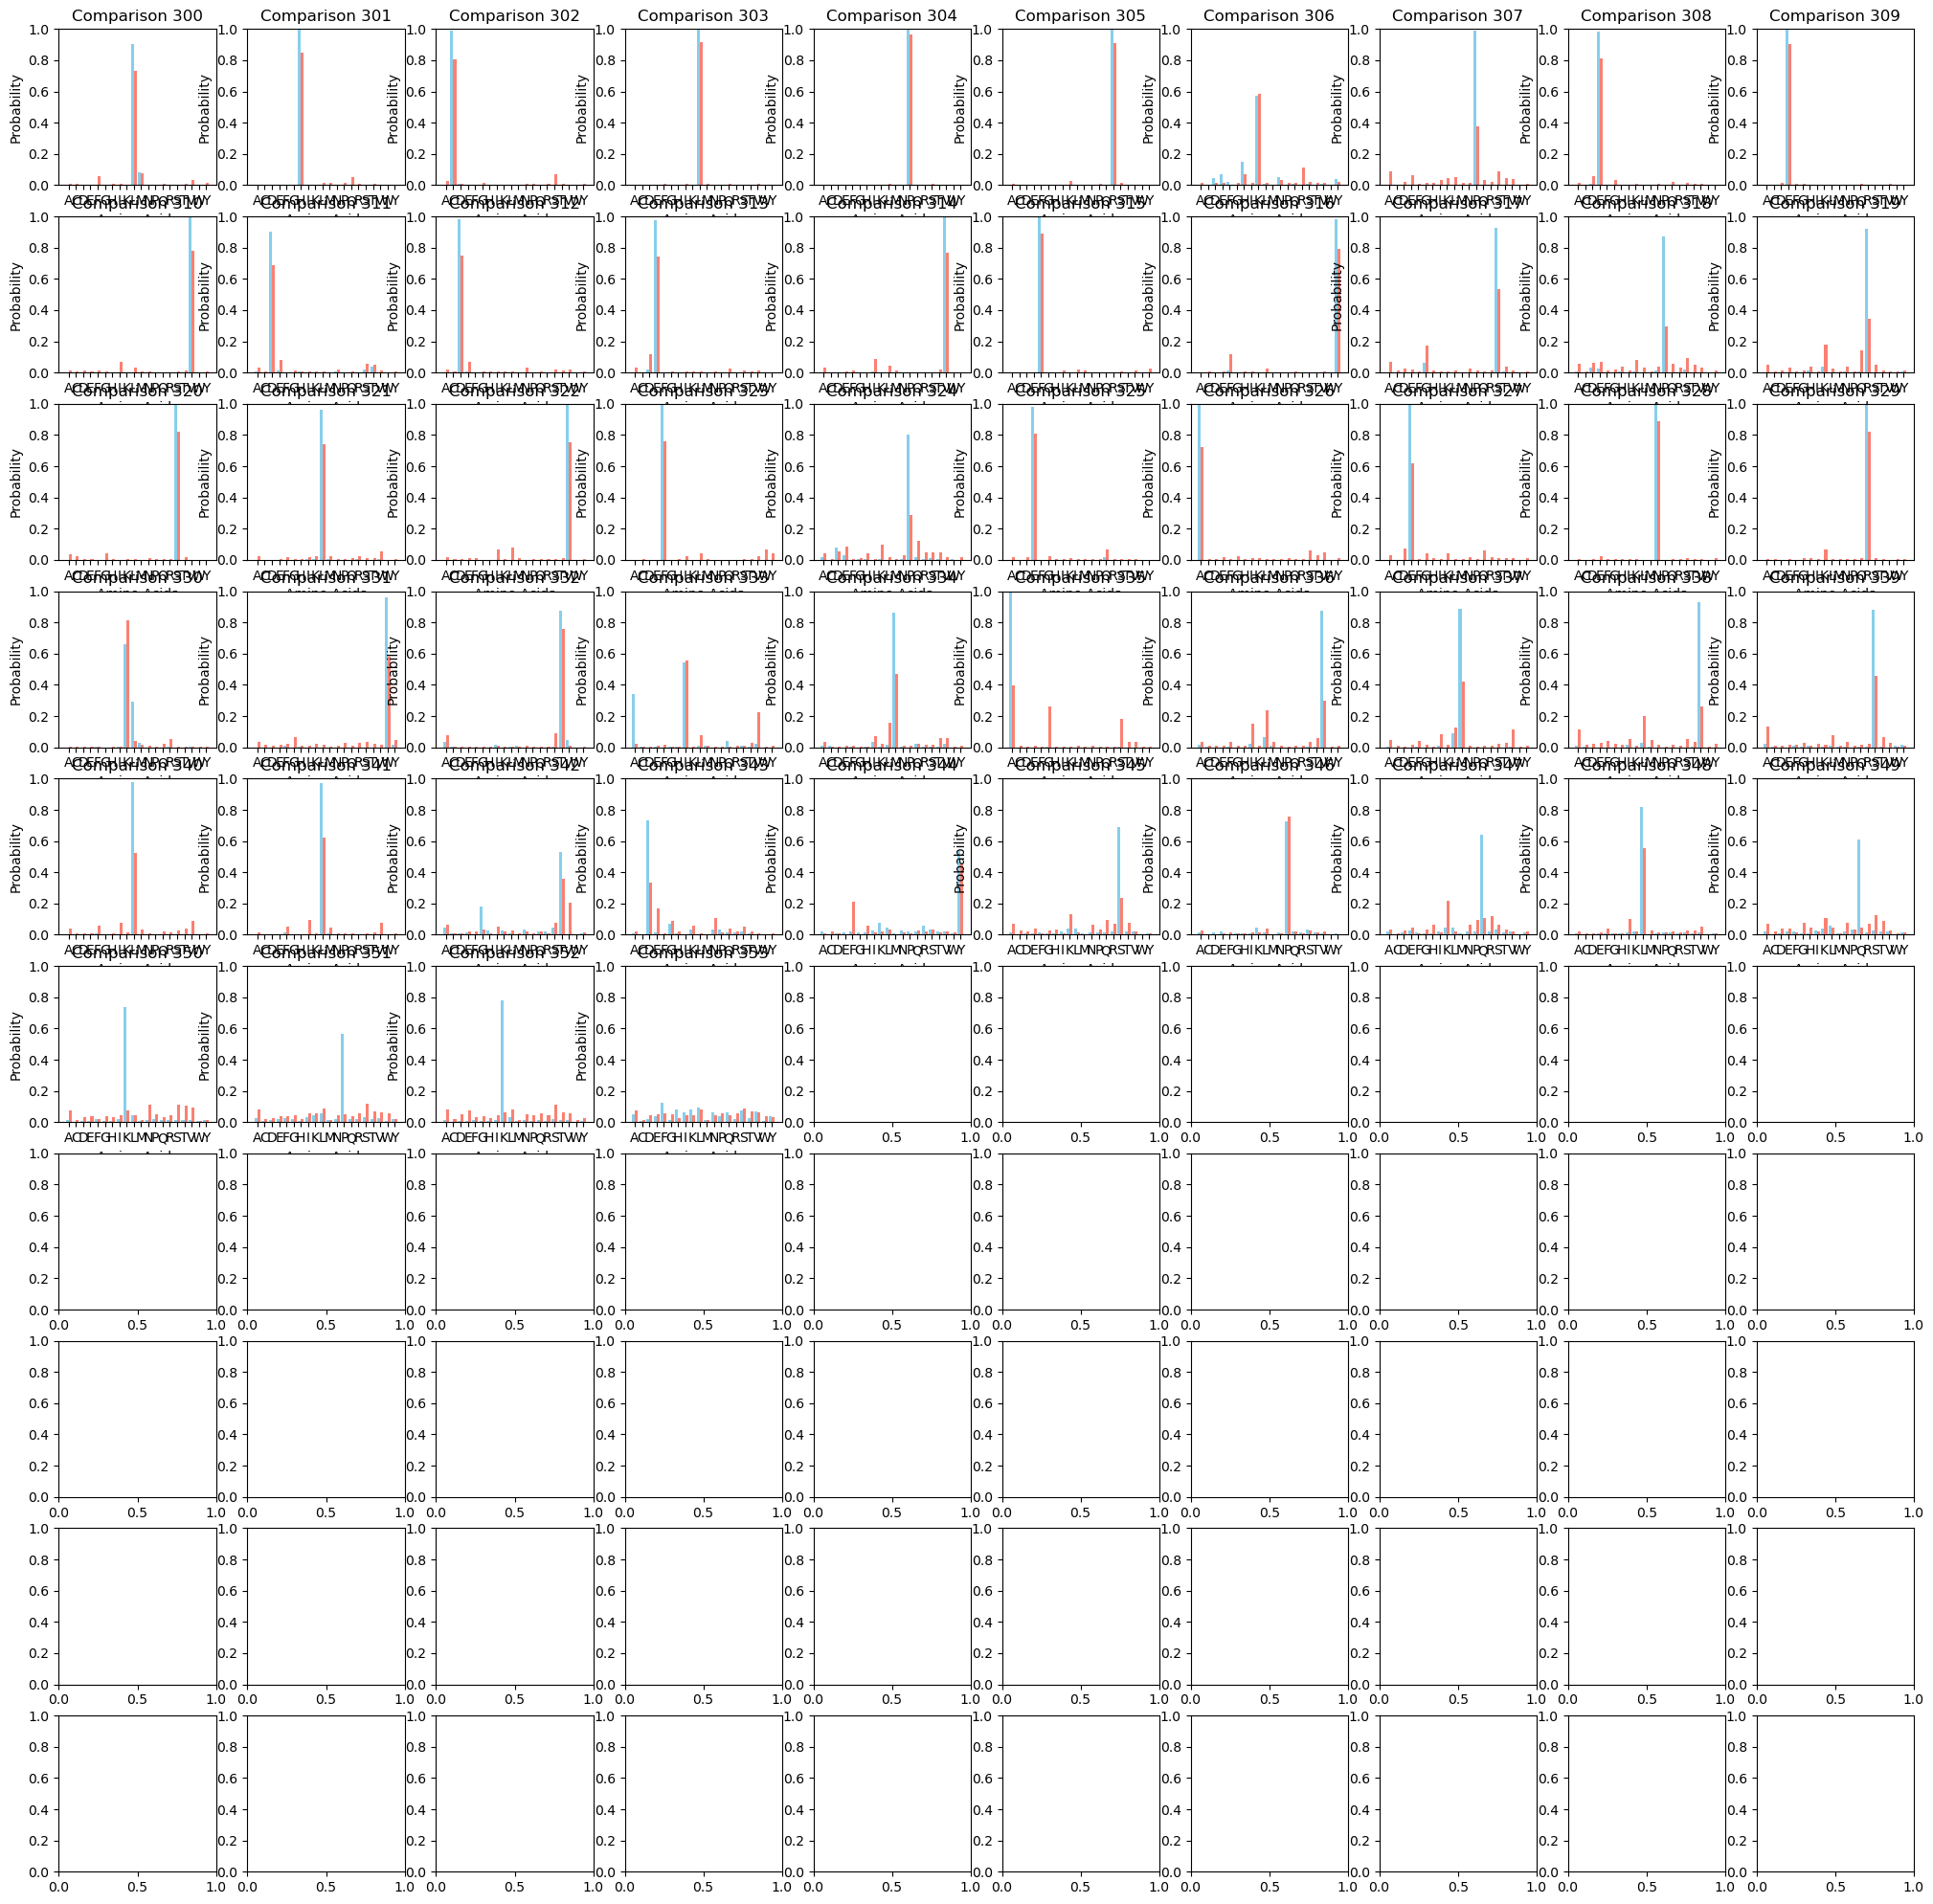

In [42]:
A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(300,354)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+300}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [43]:
index = keys[0]

A = esm_dict[index]['log_probs']
B = pg_dict[index]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1955/3831128821.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1955/3831128821.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


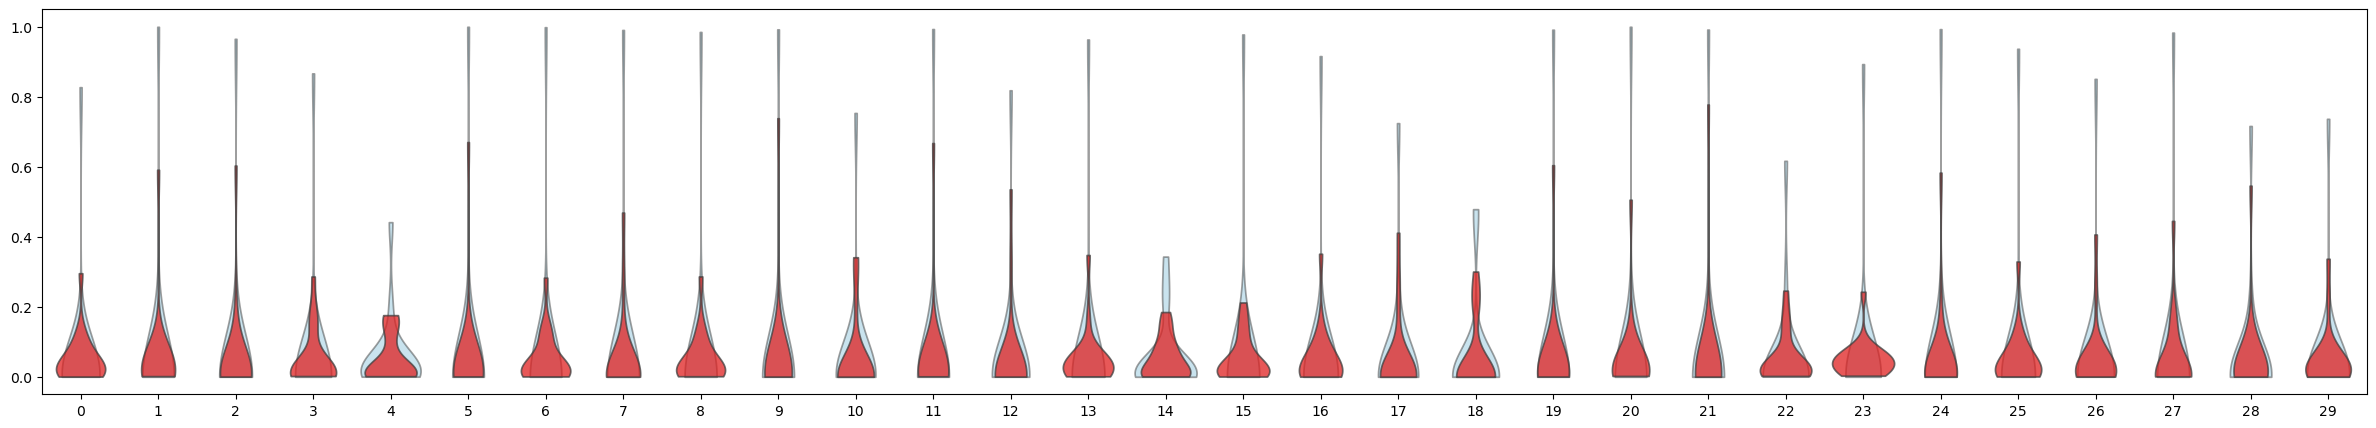

In [44]:
plt.figure(figsize=(30, 5))
sns.violinplot(data=dists1[120:150], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[120:150], color="red", alpha=0.75, inner=None, cut=0)
plt.title("")
plt.ylabel("")
plt.show()

In [ ]:
index = keys[0]
A = esm_dict[index]['log_probs']
B = pg_dict[index]['log_probs']
eA = torch.exp(A)
eB = torch.exp(B)

In [55]:
value, index = torch.max(eA[0], dim=0)
print(value)   
print(index)  
print(aa_list[index])

tensor(0.9977)
tensor(10)
M


In [56]:
value, index = torch.max(eB[0], dim=0)
print(value)   
print(index)  
print(aa_list[index])

tensor(0.4001)
tensor(10)
M


In [95]:
DA_list = []
for j in range(60):    
    index = keys[j]
    A = esm_dict[index]['log_probs']
    B = pg_dict[index]['log_probs']
    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(eA)
    ESM_mut = ""
    PG_mut = ""
    print(f"For mutation {index}")
    count = 0
    da_list=[]
    for i in range(n):
        
        valueA, indexA = torch.max(eA[i], dim=0)
        valueB, indexB = torch.max(eB[i], dim=0)
        A_aa = aa_list[indexA]
        B_aa = aa_list[indexB]
        ESM_mut = ESM_mut+A_aa
        PG_mut = PG_mut+B_aa
        if A_aa == B_aa:
            # print(i+1, "agree")
            count += 1
        else:
            da_list.append(i)
            DA_list.append(i)
    print("--------------------------------------------------------------------")
    print(ESM_mut)
    print(PG_mut)
    print("--------------------------------------------------------------------")
    print(f"ESM and PG agree at {count} positions and disagree at {n-count} positions")
    print(f"The agree {count/n} of the time")
    print(f"They disagree at positions {da_list}")
    print("====================================================================")
    print()
    # print("--------------------------------------------------------------------")
    


For mutation A102E
--------------------------------------------------------------------
MLFNLRILLNNAAFRNGHNFMVRNFRTGQPLQNKVQLKGRDLLTLKDFTGEEIKYMLDLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGMTLLGGHPIFLTTQDIQLGVNESLTDTARVLSSMLDAVMARVYKQSDLDTLAKEASIPIINGLSDLYHPLQILADYLTLQEHYGSLKGLTLSWIGDGNNILHSWMMSAAKFGMNLRAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAKGANVLITDTWISMGQEEEKKKRLQAFQGYQVTMKLAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF
MSSSSSRLLLLLLLLLLLRSSLLLLLLLLLLSSSSLNLKGKNKLLLRDLSDEIEYLLWVAADLKRKIKEKGEYLLKLLGKKLAAIFFKKSTRTRLSSETGAVLLGGAASFLTTQDIHLGVNEETADDAAVVSGMLNAIVARVFKHQDLLELAAESSVPVINGLSSDYHPPQILADLLTIIEHFGGDKGLKLAYIGDGNNVLNSWMLAAAKLGLHLRIATPPGYEPDPEVVEEALEEAKESGSILTLTNDPVEAAKGASVLVTDTWISMGQEEEKEKRLKDFQGYQVTMETAEAAKPDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPKLSSSSS
--------------------------------------------------------------------
ESM and PG agree at 215 positions and disagree at 139 positions
The agree 0.6073446327683616 of the time
They disagree at positions [

In [96]:
counts = {}
for x in DA_list:
    counts[x] = counts.get(x, 0) + 1

print(counts)

{1: 60, 2: 60, 3: 60, 4: 58, 5: 60, 6: 60, 9: 60, 10: 60, 11: 60, 12: 60, 13: 60, 14: 60, 15: 60, 16: 60, 17: 60, 18: 60, 19: 60, 20: 60, 21: 60, 22: 60, 23: 60, 24: 60, 25: 60, 26: 60, 27: 60, 28: 60, 29: 60, 31: 60, 32: 60, 33: 60, 34: 60, 35: 60, 36: 60, 37: 60, 38: 60, 39: 60, 40: 60, 41: 60, 42: 60, 43: 60, 45: 60, 46: 60, 47: 60, 48: 60, 49: 60, 50: 44, 53: 60, 55: 60, 57: 60, 58: 57, 59: 60, 64: 60, 65: 60, 68: 60, 74: 58, 75: 60, 77: 60, 80: 52, 82: 60, 83: 60, 86: 55, 88: 60, 96: 60, 100: 60, 101: 59, 106: 56, 107: 59, 108: 60, 116: 54, 122: 52, 123: 60, 124: 7, 126: 57, 128: 10, 130: 36, 132: 57, 135: 14, 137: 60, 138: 57, 142: 59, 144: 60, 145: 58, 148: 60, 149: 49, 152: 51, 154: 48, 156: 60, 158: 60, 164: 52, 165: 50, 169: 54, 175: 59, 178: 60, 179: 60, 182: 58, 184: 57, 185: 56, 189: 59, 191: 60, 192: 47, 199: 60, 201: 60, 205: 60, 206: 60, 210: 58, 212: 60, 213: 47, 216: 60, 220: 58, 226: 60, 227: 60, 229: 59, 230: 58, 231: 53, 233: 60, 234: 60, 235: 60, 239: 59, 241: 60,

In [97]:
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
print(sorted_counts)

{1: 60, 2: 60, 3: 60, 5: 60, 6: 60, 9: 60, 10: 60, 11: 60, 12: 60, 13: 60, 14: 60, 15: 60, 16: 60, 17: 60, 18: 60, 19: 60, 20: 60, 21: 60, 22: 60, 23: 60, 24: 60, 25: 60, 26: 60, 27: 60, 28: 60, 29: 60, 31: 60, 32: 60, 33: 60, 34: 60, 35: 60, 36: 60, 37: 60, 38: 60, 39: 60, 40: 60, 41: 60, 42: 60, 43: 60, 45: 60, 46: 60, 47: 60, 48: 60, 49: 60, 53: 60, 55: 60, 57: 60, 59: 60, 64: 60, 65: 60, 68: 60, 75: 60, 77: 60, 82: 60, 83: 60, 88: 60, 96: 60, 100: 60, 108: 60, 123: 60, 137: 60, 144: 60, 148: 60, 156: 60, 158: 60, 178: 60, 179: 60, 191: 60, 199: 60, 201: 60, 205: 60, 206: 60, 212: 60, 216: 60, 226: 60, 227: 60, 233: 60, 234: 60, 235: 60, 241: 60, 244: 60, 250: 60, 260: 60, 278: 60, 279: 60, 288: 60, 291: 60, 292: 60, 295: 60, 347: 60, 349: 60, 350: 60, 351: 60, 352: 60, 353: 60, 101: 59, 107: 59, 142: 59, 175: 59, 189: 59, 229: 59, 239: 59, 274: 59, 4: 58, 74: 58, 145: 58, 182: 58, 210: 58, 220: 58, 230: 58, 58: 57, 126: 57, 132: 57, 138: 57, 184: 57, 106: 56, 185: 56, 86: 55, 294: 

In [100]:
sub_dict = {k: v for k, v in counts.items() if v == 60}

In [101]:
sub_dict.keys()

dict_keys([1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 53, 55, 57, 59, 64, 65, 68, 75, 77, 82, 83, 88, 96, 100, 108, 123, 137, 144, 148, 156, 158, 178, 179, 191, 199, 201, 205, 206, 212, 216, 226, 227, 233, 234, 235, 241, 244, 250, 260, 278, 279, 288, 291, 292, 295, 347, 349, 350, 351, 352, 353])

In [76]:
index = keys[0]
A = esm_dict[index]['log_probs']
B = pg_dict[index]['log_probs']
eA = torch.exp(A)
eB = torch.exp(B)

n = len(eA)
ESM_mut = ""
PG_mut = ""
print(f"For mutation {index}")
count = 0
for i in range(n):
    valueA, indexA = torch.max(eA[i], dim=0)
    valueB, indexB = torch.max(eB[i], dim=0)
    A_aa = aa_list[indexA]
    B_aa = aa_list[indexB]
    ESM_mut = ESM_mut+A_aa
    PG_mut = PG_mut+B_aa
    if A_aa == B_aa:
        # print(i+1, "agree")
        count += 1
print("--------------------------------------------------------------------")
print(ESM_mut)
print(PG_mut)
print("--------------------------------------------------------------------")
print(f"ESM and PG agree at {count} positions and disagree at {n-count} positions")


For mutation A102E
--------------------------------------------------------------------
MLFNLRILLNNAAFRNGHNFMVRNFRTGQPLQNKVQLKGRDLLTLKDFTGEEIKYMLDLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGMTLLGGHPIFLTTQDIQLGVNESLTDTARVLSSMLDAVMARVYKQSDLDTLAKEASIPIINGLSDLYHPLQILADYLTLQEHYGSLKGLTLSWIGDGNNILHSWMMSAAKFGMNLRAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAKGANVLITDTWISMGQEEEKKKRLQAFQGYQVTMKLAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF
MSSSSSRLLLLLLLLLLLRSSLLLLLLLLLLSSSSLNLKGKNKLLLRDLSDEIEYLLWVAADLKRKIKEKGEYLLKLLGKKLAAIFFKKSTRTRLSSETGAVLLGGAASFLTTQDIHLGVNEETADDAAVVSGMLNAIVARVFKHQDLLELAAESSVPVINGLSSDYHPPQILADLLTIIEHFGGDKGLKLAYIGDGNNVLNSWMLAAAKLGLHLRIATPPGYEPDPEVVEEALEEAKESGSILTLTNDPVEAAKGASVLVTDTWISMGQEEEKEKRLKDFQGYQVTMETAEAAKPDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPKLSSSSS
--------------------------------------------------------------------
ESM and PG agree at 215 positions and disagree at 139 positions


In [71]:
index = keys[0]
A = esm_dict[index]['log_probs']
B = pg_dict[index]['log_probs']
eA = torch.exp(A)
eB = torch.exp(B)

n = len(eA)

print(f"For mutation {index}")
print("==================================================")
count = 0
for i in range(n):
    valueA, indexA = torch.max(eA[i], dim=0)
    valueB, indexB = torch.max(eB[i], dim=0)
    A_aa = aa_list[indexA]
    B_aa = aa_list[indexB]
    if A_aa == B_aa:
        print(i+1, "agree")
        count += 1
    else:
        print(i+1,f"ESM {A_aa}", f"PG {B_aa}")
    # print(f"ESM prob for {B_aa} is {eA[0][indexB]}")
    # print(f"PG prob for {A_aa} is {eB[0][indexA]}")
    print("==================================================")


For mutation A102E
1 agree
2 ESM L PG S
3 ESM F PG S
4 ESM N PG S
5 ESM L PG S
6 ESM R PG S
7 ESM I PG R
8 agree
9 agree
10 ESM N PG L
11 ESM N PG L
12 ESM A PG L
13 ESM A PG L
14 ESM F PG L
15 ESM R PG L
16 ESM N PG L
17 ESM G PG L
18 ESM H PG L
19 ESM N PG R
20 ESM F PG S
21 ESM M PG S
22 ESM V PG L
23 ESM R PG L
24 ESM N PG L
25 ESM F PG L
26 ESM R PG L
27 ESM T PG L
28 ESM G PG L
29 ESM Q PG L
30 ESM P PG L
31 agree
32 ESM Q PG S
33 ESM N PG S
34 ESM K PG S
35 ESM V PG S
36 ESM Q PG L
37 ESM L PG N
38 ESM K PG L
39 ESM G PG K
40 ESM R PG G
41 ESM D PG K
42 ESM L PG N
43 ESM L PG K
44 ESM T PG L
45 agree
46 ESM K PG L
47 ESM D PG R
48 ESM F PG D
49 ESM T PG L
50 ESM G PG S
51 ESM E PG D
52 agree
53 agree
54 ESM K PG E
55 agree
56 ESM M PG L
57 agree
58 ESM D PG W
59 ESM L PG V
60 ESM S PG A
61 agree
62 agree
63 agree
64 agree
65 ESM F PG R
66 ESM R PG K
67 agree
68 agree
69 ESM Q PG E
70 agree
71 agree
72 agree
73 agree
74 agree
75 ESM P PG L
76 ESM L PG K
77 agree
78 ESM Q PG L
79 

In [73]:
print(count, n-count)

215 139


In [69]:
index = keys[0]
A = esm_dict[index]['log_probs']
B = pg_dict[index]['log_probs']
eA = torch.exp(A)
eB = torch.exp(B)

print(f"For mutation {index}")
print("==================================================")

for i in range(100,120):
    valueA, indexA = torch.max(eA[i], dim=0)
    valueB, indexB = torch.max(eB[i], dim=0)
    A_aa = aa_list[indexA]
    B_aa = aa_list[indexB]
    print(f"At position {i+1}")
    print(f"{A_aa} chosen by ESM2 with prob {valueA}")
    print(f"{B_aa} chosen by PG2 with prob {valueB}")
    print(f"ESM prob for {B_aa} is {eA[0][indexB]}")
    print(f"PG prob for {A_aa} is {eB[0][indexA]}")
    print("==================================================")
    

For mutation A102E
At position 101
M chosen by ESM2 with prob 0.7353893518447876
A chosen by PG2 with prob 0.6389053463935852
ESM prob for A is 9.95992959360592e-05
PG prob for M is 0.4000988304615021
At position 102
T chosen by ESM2 with prob 0.6811640858650208
V chosen by PG2 with prob 0.29896122217178345
ESM prob for V is 0.00017317231686320156
PG prob for T is 0.03737660497426987
At position 103
L chosen by ESM2 with prob 0.6446589231491089
L chosen by PG2 with prob 0.16487736999988556
ESM prob for L is 0.00029147692839615047
PG prob for L is 0.05208902060985565
At position 104
L chosen by ESM2 with prob 0.9946377873420715
L chosen by PG2 with prob 0.6742241382598877
ESM prob for L is 0.00029147692839615047
PG prob for L is 0.05208902060985565
At position 105
G chosen by ESM2 with prob 0.9990243911743164
G chosen by PG2 with prob 0.5477026700973511
ESM prob for G is 5.569511995417997e-05
PG prob for G is 0.036307442933321
At position 106
G chosen by ESM2 with prob 0.999196827411651